In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}

In [3]:
# url_fb = 'https://finviz.com/quote.ashx?t=FB'
# news_fb_request = requests.get(url_fb, headers=headers).content
# news_fb_content = bs(news_fb_request, 'html.parser')

In [4]:
# news_fb_table = news_fb_content.find_all('table', attrs={'id':'news-table'})

In [5]:
# for i,news in enumerate(news_fb_table):
#     print(news.text)

In [6]:
# news_fb_table_tr = news_fb_table[0].find_all('tr')
# news_fb_table_tr[0].text.split('PM')[0][:-6]

In [7]:
# news_fb_list

In [8]:
# news_des
# news_fb_df = pd.DataFrame(news_fb_list)
# news_fb_df.head()

In [3]:
def news_list_request(news_list, news_table_tr, tag):
    for news in news_table_tr:
        news_tag={}
        news_tag['ticker'] = tag.lower()
        temp = news.find('td').text.split()
        if len(temp) == 1:
            news_tag['time'] = temp[0]
            news_tag['date'] = temp2
        else:
            news_tag['date'] = temp[0]
            temp2 = temp[0]
            news_tag['time'] = temp[1]
        news_tag['description']=news.find('a').text
        news_list.append(news_tag)
    return news_list

In [4]:
def news_headline(tag_list, news_list):
    for tag in tag_list:
        url = 'https://finviz.com/quote.ashx?t='+tag
        news_request = requests.get(url, headers=headers).content
        news_content = bs(news_request, 'html.parser')
        news_table = news_content.find_all('table', attrs={'id':'news-table'})
        news_table_tr = news_table[0].find_all('tr')
        news_list = news_list_request(news_list,news_table_tr, tag)
    return news_list

In [5]:
news_list=[]
news_all_list = news_headline(['FB', 'TSLA'], news_list)
news_df = pd.DataFrame(news_all_list)
news_df.to_csv('news.csv')
news_df.head()

,date,description,ticker,time
0,Aug-15-20,Trump Orders TikToks Chinese Parent to Sell It...,fb,01:27PM
1,Aug-15-20,"Benzinga's Bulls And Bears Of The Week: CVS, M...",fb,01:26PM
2,Aug-14-20,Robinhood Has Mastered the Stock Market Game. ...,fb,08:36PM
3,Aug-14-20,"Facebook Debuts Paid Online Events, Swipes at ...",fb,07:19PM
4,Aug-14-20,Facebook Joins the List of Apple App Store Cri...,fb,06:33PM


In [6]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
date           200 non-null object
description    200 non-null object
ticker         200 non-null object
time           200 non-null object
dtypes: object(4)
memory usage: 6.3+ KB


In [7]:
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

In [8]:
vader_fb = SentimentIntensityAnalyzer()
vader_fb.lexicon.update(new_words)

In [9]:
news_df = news_df.join(news_df['description'].apply(lambda x:vader_fb.polarity_scores(x)).apply(pd.Series))
news_df.head()

,date,description,ticker,time,neg,neu,pos,compound
0,Aug-15-20,Trump Orders TikToks Chinese Parent to Sell It...,fb,01:27PM,0.000,0.841,0.159,0.1779
1,Aug-15-20,"Benzinga's Bulls And Bears Of The Week: CVS, M...",fb,01:26PM,0.000,1.000,0.000,0.0000
2,Aug-14-20,Robinhood Has Mastered the Stock Market Game. ...,fb,08:36PM,0.000,0.876,0.124,0.1779
3,Aug-14-20,"Facebook Debuts Paid Online Events, Swipes at ...",fb,07:19PM,0.000,1.000,0.000,0.0000
4,Aug-14-20,Facebook Joins the List of Apple App Store Cri...,fb,06:33PM,0.216,0.784,0.000,-0.2960


In [10]:
news_df['date'] = pd.to_datetime(news_df['date']).dt.date
news_df.head()

,date,description,ticker,time,neg,neu,pos,compound
0,2020-08-15,Trump Orders TikToks Chinese Parent to Sell It...,fb,01:27PM,0.000,0.841,0.159,0.1779
1,2020-08-15,"Benzinga's Bulls And Bears Of The Week: CVS, M...",fb,01:26PM,0.000,1.000,0.000,0.0000
2,2020-08-14,Robinhood Has Mastered the Stock Market Game. ...,fb,08:36PM,0.000,0.876,0.124,0.1779
3,2020-08-14,"Facebook Debuts Paid Online Events, Swipes at ...",fb,07:19PM,0.000,1.000,0.000,0.0000
4,2020-08-14,Facebook Joins the List of Apple App Store Cri...,fb,06:33PM,0.216,0.784,0.000,-0.2960


In [12]:
news_grp = news_df.groupby(['date', 'ticker']).mean()
news_grp = news_grp.unstack(level='ticker')
news_grp

neg                 neu                 pos            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2020-08-06  0.000000       NaN  0.931250       NaN  0.068750       NaN   
2020-08-07  0.149579       NaN  0.789789       NaN  0.060632       NaN   
2020-08-08  0.147000       NaN  0.745667       NaN  0.107333       NaN   
2020-08-09  0.000000       NaN  1.000000       NaN  0.000000       NaN   
2020-08-10  0.110438       NaN  0.796312       NaN  0.093250       NaN   
2020-08-11  0.149500       NaN  0.759571       NaN  0.090929       NaN   
2020-08-12  0.132900  0.045286  0.806800  0.898286  0.060400  0.056405   
2020-08-13  0.047727  0.045000  0.867091  0.836435  0.085182  0.118522   
2020-08-14  0.086647  0.059931  0.874412  0.841586  0.038882  0.098483   
2020-08-15  0.000000  0.081000  0.920500  0.761500  0.079500  0.157667   

            compound            
ticker            fb      tsla  
date                            
2020-08-06  0.125100       NaN  
2020-08-07 -0.131142       NaN  
2020-08-08 -0.094717       NaN  
2020-08-09  0.000000       NaN  
2020-08-10 -0.030463       NaN  
2020-08-11 -0.076014       NaN  
2020-08-12 -0.141560  0.029431  
2020-08-13  0.059891  0.131404  
2020-08-14 -0.105900  0.074083  
2020-08-15  0.088950  0.141200

In [13]:
news_grp.fillna(0.0, inplace=True)
news_grp.head()

neg            neu            pos       compound     
ticker            fb tsla        fb tsla        fb tsla        fb tsla
date                                                                  
2020-08-06  0.000000  0.0  0.931250  0.0  0.068750  0.0  0.125100  0.0
2020-08-07  0.149579  0.0  0.789789  0.0  0.060632  0.0 -0.131142  0.0
2020-08-08  0.147000  0.0  0.745667  0.0  0.107333  0.0 -0.094717  0.0
2020-08-09  0.000000  0.0  1.000000  0.0  0.000000  0.0  0.000000  0.0
2020-08-10  0.110438  0.0  0.796312  0.0  0.093250  0.0 -0.030463  0.0

In [19]:
news_grp

neg                 neu                 pos            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2020-04-15  0.000000  0.039192  0.000000  0.914846  0.000000  0.045962   
2020-04-16  0.000000  0.090900  0.000000  0.797400  0.000000  0.111600   
2020-04-17  0.000000  0.016778  0.000000  0.937778  0.000000  0.045556   
2020-04-18  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
2020-04-19  0.000000  0.000000  0.000000  0.815000  0.000000  0.185000   
2020-04-20  0.000000  0.000000  0.000000  0.861167  0.000000  0.138833   
2020-04-21  0.061421  0.038333  0.860684  0.926167  0.077895  0.035500   
2020-04-22  0.025469  0.046000  0.887313  0.925417  0.087219  0.028583   
2020-04-23  0.000000  0.062900  0.746200  0.862600  0.253800  0.074500   
2020-04-24  0.055889  0.036818  0.856889  0.807091  0.087259  0.156091   
2020-04-25  0.078000  0.000000  0.782778  1.000000  0.139222  0.000000   
2020-04-26  0.000000  0.037600  0.873667  0.925000  0.126333  0.037400   

            compound            
ticker            fb      tsla  
date                            
2020-04-15  0.000000  0.011969  
2020-04-16  0.000000 -0.017080  
2020-04-17  0.000000  0.052511  
2020-04-18  0.000000  0.000000  
2020-04-19  0.000000  0.361200  
2020-04-20  0.000000  0.135267  
2020-04-21  0.011384  0.016150  
2020-04-22  0.086719 -0.041825  
2020-04-23  0.379110 -0.013400  
2020-04-24  0.042848  0.163564  
2020-04-25  0.178756  0.000000  
2020-04-26  0.223500 -0.050740

In [14]:
news_grp=news_grp.xs('compound', axis=1)
news_grp.head()

ticker,fb,tsla
date,,
2020-08-06,0.125100,0.0
2020-08-07,-0.131142,0.0
2020-08-08,-0.094717,0.0
2020-08-09,0.000000,0.0
2020-08-10,-0.030463,0.0


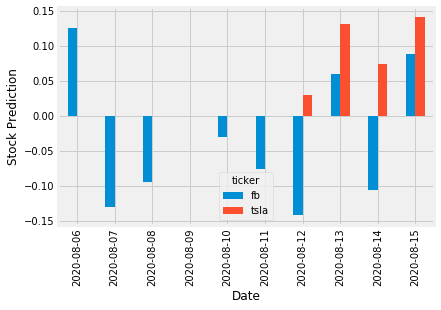

In [15]:
plt.style.use("fivethirtyeight")
%matplotlib inline
news_grp.plot.bar()
plt.xlabel('Date')
plt.ylabel('Stock Prediction')
plt.show()

In [16]:
news_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2020-08-06 to 2020-08-15
Data columns (total 2 columns):
fb      10 non-null float64
tsla    10 non-null float64
dtypes: float64(2)
memory usage: 240.0+ bytes


In [17]:
news_df.head()

,date,description,ticker,time,neg,neu,pos,compound
0,2020-08-15,Trump Orders TikToks Chinese Parent to Sell It...,fb,01:27PM,0.000,0.841,0.159,0.1779
1,2020-08-15,"Benzinga's Bulls And Bears Of The Week: CVS, M...",fb,01:26PM,0.000,1.000,0.000,0.0000
2,2020-08-14,Robinhood Has Mastered the Stock Market Game. ...,fb,08:36PM,0.000,0.876,0.124,0.1779
3,2020-08-14,"Facebook Debuts Paid Online Events, Swipes at ...",fb,07:19PM,0.000,1.000,0.000,0.0000
4,2020-08-14,Facebook Joins the List of Apple App Store Cri...,fb,06:33PM,0.216,0.784,0.000,-0.2960


In [18]:
news_grp_df1 = news_df.set_index(['ticker', 'date'])
news_grp_df1.head()

description     time  \
ticker date                                                                     
fb     2020-08-15  Trump Orders TikToks Chinese Parent to Sell It...  01:27PM   
       2020-08-15  Benzinga's Bulls And Bears Of The Week: CVS, M...  01:26PM   
       2020-08-14  Robinhood Has Mastered the Stock Market Game. ...  08:36PM   
       2020-08-14  Facebook Debuts Paid Online Events, Swipes at ...  07:19PM   
       2020-08-14  Facebook Joins the List of Apple App Store Cri...  06:33PM   

                     neg    neu    pos  compound  
ticker date                                       
fb     2020-08-15  0.000  0.841  0.159    0.1779  
       2020-08-15  0.000  1.000  0.000    0.0000  
       2020-08-14  0.000  0.876  0.124    0.1779  
       2020-08-14  0.000  1.000  0.000    0.0000  
       2020-08-14  0.216  0.784  0.000   -0.2960

In [19]:
news_fb_df = news_grp_df1.xs('fb', axis=0)
news_fb_df

,description,time,neg,neu,pos,compound
date,,,,,,
2020-08-15,Trump Orders TikToks Chinese Parent to Sell It...,01:27PM,0.000,0.841,0.159,0.1779
2020-08-15,"Benzinga's Bulls And Bears Of The Week: CVS, M...",01:26PM,0.000,1.000,0.000,0.0000
2020-08-14,Robinhood Has Mastered the Stock Market Game. ...,08:36PM,0.000,0.876,0.124,0.1779
2020-08-14,"Facebook Debuts Paid Online Events, Swipes at ...",07:19PM,0.000,1.000,0.000,0.0000
2020-08-14,Facebook Joins the List of Apple App Store Cri...,06:33PM,0.216,0.784,0.000,-0.2960
2020-08-14,Pinterest Delays New Board Member as Workers P...,06:11PM,0.222,0.778,0.000,-0.2500
2020-08-14,'Blackmailers stole our Instagram account',05:25PM,0.000,1.000,0.000,0.0000
2020-08-14,Facebook Says Apple In-App Fees Hurt Businesse...,04:41PM,0.298,0.702,0.000,-0.5267
2020-08-14,Alphabet Inc. Cl A stock underperforms Friday ...,04:25PM,0.000,1.000,0.000,0.0000


In [20]:
news_fb_df.time = pd.to_datetime(news_fb_df.time).dt.time
news_fb_df.sort_index()

C:\Users\samya\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,description,time,neg,neu,pos,compound
date,,,,,,
2020-08-06,Facebook Gave Preferential Treatment to Right-...,18:39:00,0.000,1.000,0.000,0.0000
2020-08-06,Facebook employees to work from home until Jul...,23:13:00,0.000,1.000,0.000,0.0000
2020-08-06,"The Nasdaq Hit 11,000 Because the Jobless Clai...",18:52:00,0.000,0.855,0.145,0.3724
2020-08-06,Facebook Extends Option for Employees to Work ...,19:03:00,0.000,0.870,0.130,0.1280
2020-08-07,Facebook founder sees wealth hit $100bn after ...,00:18:00,0.000,0.738,0.262,0.4939
2020-08-07,The CEO who made one of Silicon Valleys worst ...,19:59:00,0.227,0.773,0.000,-0.6249
2020-08-07,Facebook joins Microsoft in condemning Apple A...,16:58:00,0.000,1.000,0.000,0.0000
2020-08-07,Sen. Sanders proposed tax bill could cost Jeff...,16:44:00,0.000,1.000,0.000,0.0000
2020-08-07,TikToks Fate Is Unclear. What It Means for Soc...,16:43:00,0.182,0.818,0.000,-0.2500


In [21]:
date_list = news_fb_df.index.unique()
date_list

DatetimeIndex(['2020-08-15', '2020-08-14', '2020-08-13', '2020-08-12',
               '2020-08-11', '2020-08-10', '2020-08-09', '2020-08-08',
               '2020-08-07', '2020-08-06'],
              dtype='datetime64[ns]', name='date', freq=None)

ValueError: No axis named 1 for object type <class 'type'>

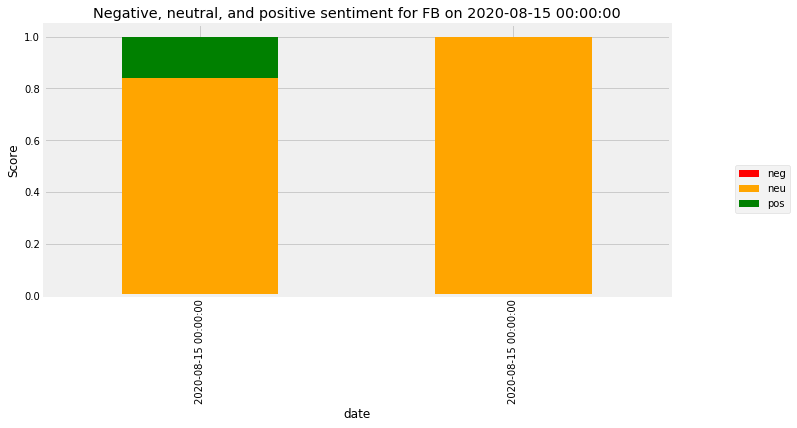

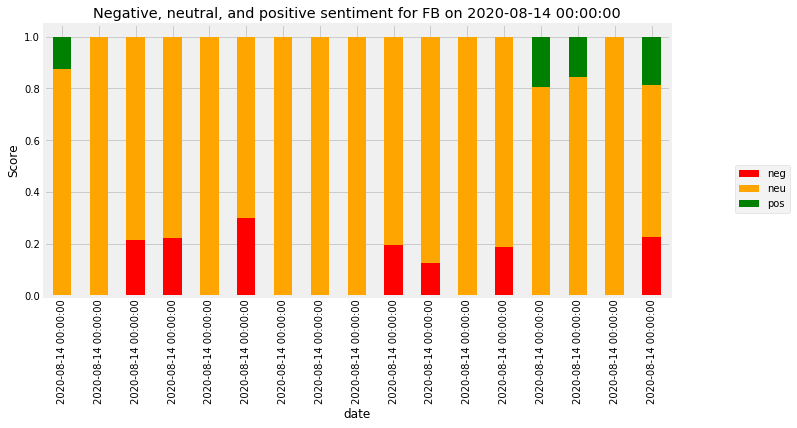

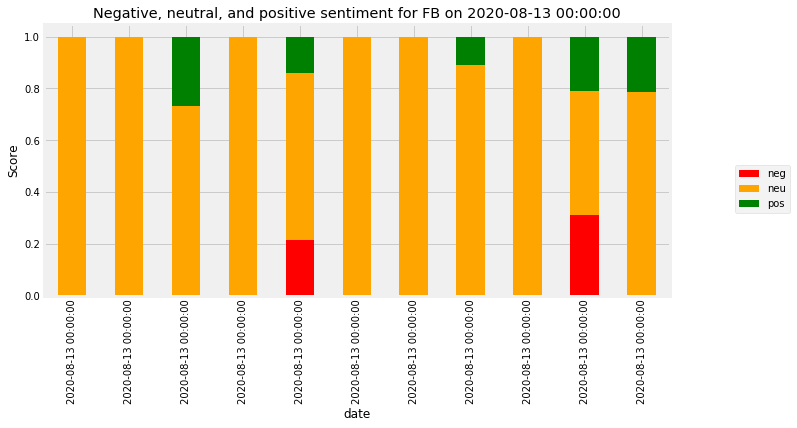

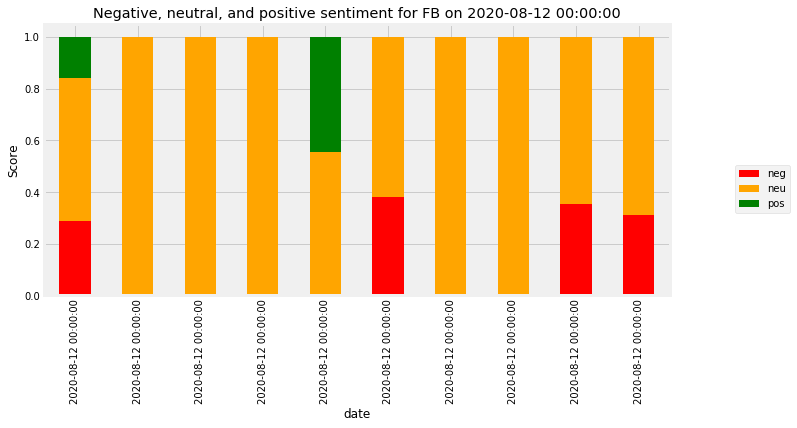

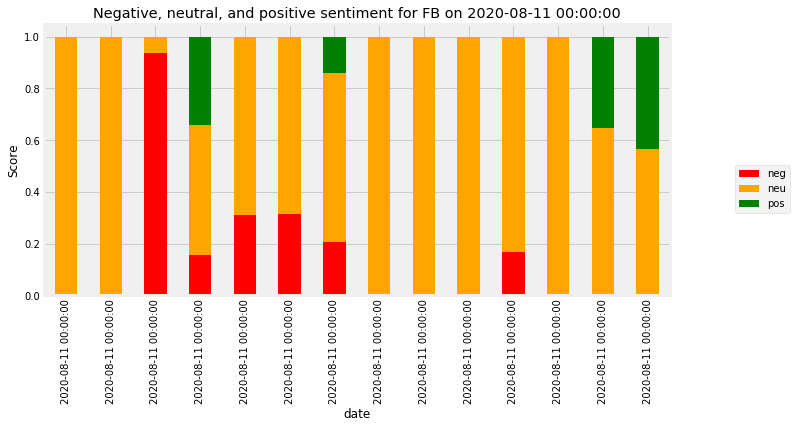

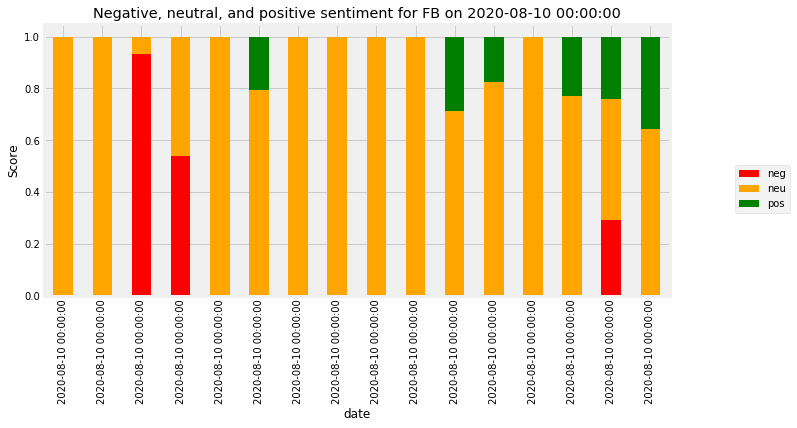

In [24]:
for day in date_list:
    news_fb = news_fb_df.loc[day].copy()
#     news_fb.set_index('time', inplace=True)
    news_fb.sort_index()
    title = "Negative, neutral, and positive sentiment for FB on "+str(day)
    colors = ["red","orange", "green"]
    news_fb.drop(['description', 'compound'], axis=1, inplace=True)
    news_fb.plot.bar(stacked=True, title=title, color=colors, figsize=(10,5)).legend(bbox_to_anchor=[1.2,0.5])
    plt.ylabel('Score')
    

In [25]:
vader_fb.lexicon.update(new_words)

In [27]:
vader_fb.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [ ]:
word_list=pd.DataFrame(list(vader_fb.lexicon))